In [3]:
import numpy as np
import pims
from pims.bioformats import BioformatsReader
import skimage as ski
import skimage.transform as skitransform
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn import linear_model
import sklearn
import register_stack_correlation_lib as reglib
%load_ext autoreload
%autoreload 2


In [17]:
# Load image reader
image_source = ('/Users/andrewkennard/Desktop/'
                '20180502_63x_2xopt_Wounding_2_Subimage_downsampled.tif')
images = BioformatsReader(image_source)
images.bundle_axes = 'zyx'
images.iter_axes = 't'

/Users/andrewkennard/.virtualenvs/myenv/lib/python3.6/site-packages/pims/bioformats.py:386: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


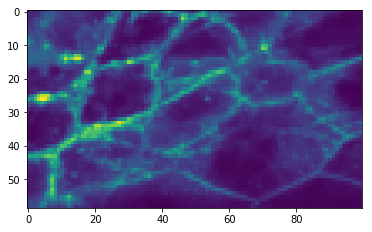

In [21]:
# Set two example images (zyx stacks) and downsample
downscale_factor = 4
im0 = images[10]
im1 = images[11]
im0_downscaled = reglib.downscale_frame(im0,downscale_factor)
im1_downscaled = reglib.downscale_frame(im1,downscale_factor)

Time elapsed: 		 8.601856154971756
Fitted intercept: 	 -6.9090909090909065


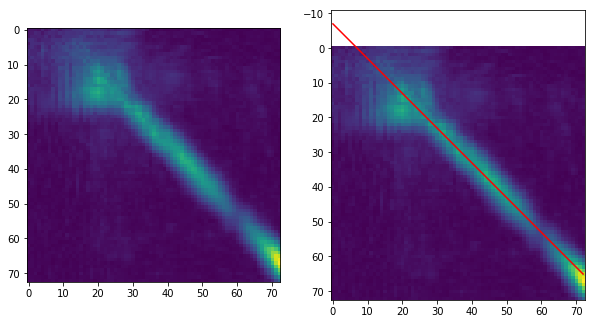

In [41]:
# Compute phase correlation and the correct fitted intercept for the correlation
t0 = time.perf_counter()
max_correlation = reglib.compute_phase_corr_stacks(im0_downscaled,im1_downscaled)
t1 = time.perf_counter()
print("Time elapsed: \t\t", t1-t0)
fig,ax = plt.subplots(figsize=(10,20),ncols=2)
ax[0].imshow(max_correlation)
ax[1].imshow(max_correlation)
intercept = reglib.fit_intercept_ransac(max_correlation)
X = np.arange(max_correlation.shape[0])
ax[1].plot(X,X+intercept,c='r')
print("Fitted intercept: \t", intercept)